In [38]:
!pip install sodapy
%matplotlib notebook

import pandas as pd 
import numpy as np
import requests
import random
import json
from pprint import pprint
import dateutil
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [39]:
!cd

C:\Bootcamp\Projects\Project_2\animal_rescue_atx\usr\ufuk


In [40]:
austin_pet = "Austin_Animal_Center_Outcomes.csv"

austin_pet

'Austin_Animal_Center_Outcomes.csv'

In [41]:
austin_pet_df = pd.read_csv(austin_pet)

In [42]:
#austin_pet_df.head()
austin_pet_df ['Date'] = austin_pet_df['MonthYear'].str[0:10]


In [43]:
#Only dogs
columns_to_keep = ["Animal Type", "Breed", "Outcome Type", "Color", "Date"]  

# List of columns to keep in dataframe
groupby_dog_db= austin_pet_df[columns_to_keep][(austin_pet_df['Animal Type']=='Dog') & 
                                               (austin_pet_df['Outcome Type']=='Transfer') |
                                               (austin_pet_df['Outcome Type']=='Euthanasia') |
                                               (austin_pet_df['Outcome Type']=='Died') |
                                               (austin_pet_df['Outcome Type']=='Adoption') |
                                               (austin_pet_df['Outcome Type']=='Return to Owner')]
groupby_dog_db.head()


,Animal Type,Breed,Outcome Type,Color,Date
0,Dog,German Shepherd,Return to Owner,Black/Brown,09/12/2019
1,Dog,German Shepherd,Return to Owner,Black/Brown,09/12/2019
2,Dog,Cairn Terrier/Chihuahua Longhair,Adoption,Black/White,09/12/2019
4,Dog,Siberian Husky,Adoption,Gray/White,09/12/2019
5,Dog,St. Bernard Rough Coat,Return to Owner,Tan,09/12/2019


In [44]:
#Color Value Count
groupby_dog_db.Color.value_counts()

Black/White               9446
Black                     6426
Brown                     4313
White                     3470
Brown/White               3388
Tan/White                 3280
Brown Tabby               3243
Tan                       2676
White/Black               2558
Tricolor                  2465
Black/Tan                 2441
Blue/White                2421
Black/Brown               2191
White/Brown               2031
Brown Brindle/White       1829
Brown/Black               1821
Brown Tabby/White         1791
White/Tan                 1632
Orange Tabby              1573
Red                       1326
Blue                      1171
Red/White                 1141
Calico                    1045
Tortie                     990
Tan/Black                  966
Brown Brindle              933
Orange Tabby/White         877
Blue Tabby                 846
Chocolate/White            803
Torbie                     683
                          ... 
Gray/Green                   1
Black/Se

In [45]:
groupby_dog_db.Breed.value_counts()[:5]

Domestic Shorthair Mix     16326
Pit Bull Mix                7947
Labrador Retriever Mix      6243
Chihuahua Shorthair Mix     5993
German Shepherd Mix         2706
Name: Breed, dtype: int64

In [46]:
groupby_dog_db["Outcome Type"].value_counts()

Adoption           46813
Return to Owner    19209
Transfer           13209
Euthanasia          7437
Died                1007
Name: Outcome Type, dtype: int64

In [47]:
ranked_breeds = groupby_dog_db.groupby(['Breed', 'Outcome Type', 'Color']).count().reset_index()
ranked_breeds.sort_values(by=['Animal Type'], ascending=False)
# ranked_breeds.sort_values(by=['Animal Type', 'Breed'], inplace=True, ascending=False)
# ranked_breeds_graph = ranked_breeds.iloc[:50]
# ranked_breeds_graph

,Breed,Outcome Type,Color,Animal Type,Date
8041,Domestic Shorthair Mix,Adoption,Brown Tabby,2105,2105
8013,Domestic Shorthair Mix,Adoption,Black,1753,1753
8023,Domestic Shorthair Mix,Adoption,Black/White,1266,1266
8049,Domestic Shorthair Mix,Adoption,Brown Tabby/White,1173,1173
2260,Bat Mix,Euthanasia,Brown,1163,1163
8095,Domestic Shorthair Mix,Adoption,Orange Tabby,982,982
10575,Labrador Retriever Mix,Adoption,Black/White,885,885
8054,Domestic Shorthair Mix,Adoption,Calico,679,679
8109,Domestic Shorthair Mix,Adoption,Tortie,650,650
10558,Labrador Retriever Mix,Adoption,Black,582,582


In [48]:
# ranked_breeds = groupby_dog_db.groupby(['Outcome Type', 'Color']).count().reset_index()
# ranked_breeds.sort_values(by=['Animal Type'], ascending=False)
# adoption_color_top10 = (ranked_breeds[ranked_breeds["Outcome Type"]=='Adoption']).sort_values(by=['Breed'], ascending=False)[:10]
# adoption_color_top10.head()

In [49]:
ranked_breeds = groupby_dog_db.groupby(['Outcome Type', 'Color']).count().reset_index()
ranked_breeds.sort_values(by=['Animal Type'], ascending=False)
adoption_color_top10 = (ranked_breeds[ranked_breeds["Outcome Type"]=='Adoption']).sort_values(by=['Breed'], ascending=False)[:10]
adoption_color_top10.head()

,Outcome Type,Color,Animal Type,Breed,Date
41,Adoption,Black/White,5276,5276,5276
5,Adoption,Black,3722,3722,3722
115,Adoption,Brown Tabby,2643,2643,2643
340,Adoption,Tan/White,1623,1623,1623
147,Adoption,Brown/White,1572,1572,1572


In [50]:
adoption_color_top10 =adoption_color_top10.drop("Breed",1)

In [51]:
adoption_color_top10=adoption_color_top10.rename(columns={'Animal Type':'Count'})

In [52]:
adoption_color_top10

,Outcome Type,Color,Count,Date
41,Adoption,Black/White,5276,5276
5,Adoption,Black,3722,3722
115,Adoption,Brown Tabby,2643,2643
340,Adoption,Tan/White,1623,1623
147,Adoption,Brown/White,1572,1572
126,Adoption,Brown Tabby/White,1472,1472
368,Adoption,White,1425,1425
371,Adoption,White/Black,1362,1362
94,Adoption,Blue/White,1330,1330
327,Adoption,Tan,1275,1275


In [53]:
for lab in adoption_color_top10.Color:
    print(lab)

Black/White
Black
Brown Tabby
Tan/White
Brown/White
Brown Tabby/White
White
White/Black
Blue/White
Tan


In [54]:
sizes = []

for x in adoption_color_top10.Count:
    sizes.append(x)

In [55]:
sizes

[5276, 3722, 2643, 1623, 1572, 1472, 1425, 1362, 1330, 1275]

In [56]:
labels = []
for x in adoption_color_top10.Color:
    labels.append(f"{x}")

In [57]:
labels

['Black/White',
 'Black',
 'Brown Tabby',
 'Tan/White',
 'Brown/White',
 'Brown Tabby/White',
 'White',
 'White/Black',
 'Blue/White',
 'Tan']

In [58]:
# labels = 'Black/White','Black','Brown Tabby','Tan/White','Brown/White','Brown Tabby/White','White','White/Black','Blue/White','Tan'
# sizes = [5276, 3722, 2643, 1623, 1572, 1472, 1425, 1362, 1330, 1275]

<IPython.core.display.Javascript object>


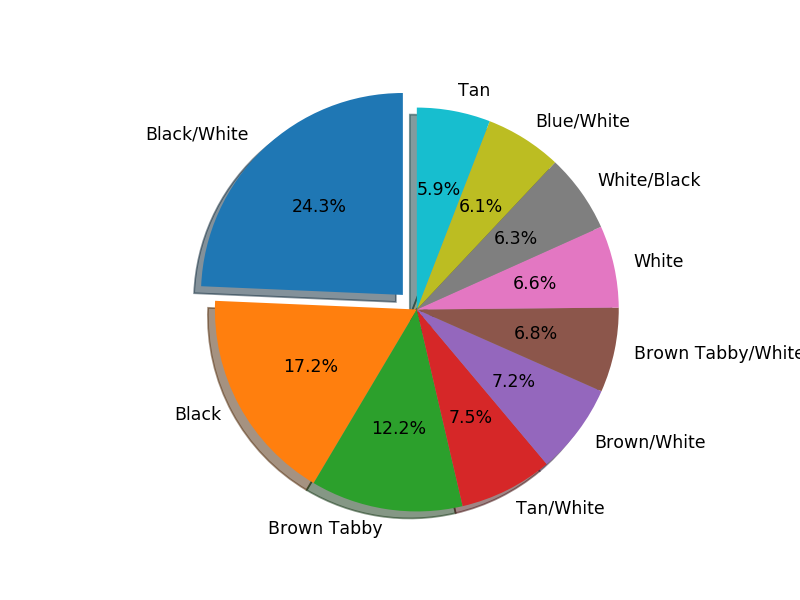

In [59]:
#Adaptotion Color Percentage

import matplotlib.pyplot as plt

lables = adoption_color_top10.Color
sizes = adoption_color_top10.Count

explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct = '%1.1f%%', shadow=True, startangle=90)

ax1.axis('equal')

plt.show()
plt.savefig('dogbreed_piechart')

In [62]:
ranked_breeds = groupby_dog_db.groupby(['Breed', 'Outcome Type']).count().reset_index()
ranked_breeds.sort_values(by=['Animal Type', 'Breed'], inplace=True, ascending=False)
ranked_breeds_graph = ranked_breeds.iloc[:15]
ranked_breeds_graph.head()
plt.savefig('dogbreed_piechart')

In [61]:
ranked_breeds = groupby_dog_db.groupby(['Outcome Type']).count().reset_index()
ranked_breeds.sort_values(by=['Animal Type', 'Breed'], inplace=True, ascending=False)
ranked_breeds_graph = ranked_breeds.iloc[:15]
ranked_breeds_graph.head()

,Outcome Type,Animal Type,Breed,Color,Date
0,Adoption,46813,46813,46813,46813
3,Return to Owner,19209,19209,19209,19209
4,Transfer,13209,13209,13209,13209
2,Euthanasia,7437,7437,7437,7437
1,Died,1007,1007,1007,1007


<IPython.core.display.Javascript object>


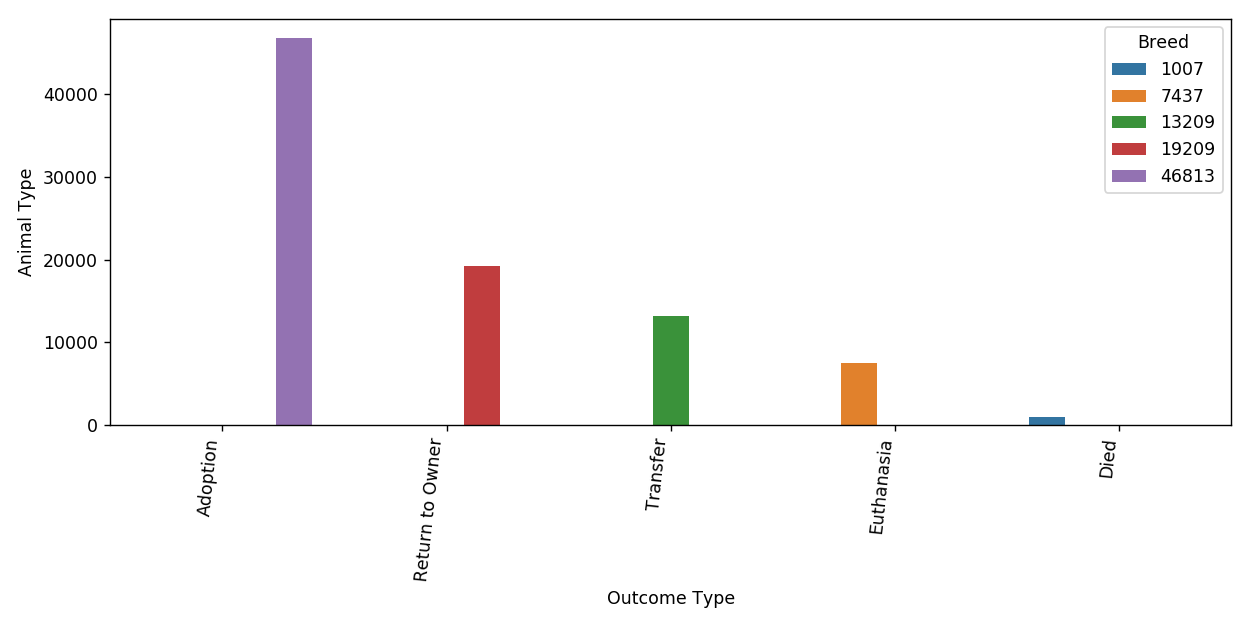

In [25]:
import seaborn as sns
plt.figure(figsize=(10,5))

chart = sns.barplot(ranked_breeds_graph['Outcome Type'], ranked_breeds_graph['Animal Type'], hue=ranked_breeds_graph['Breed'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=84)
plt.xticks(ha='right')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


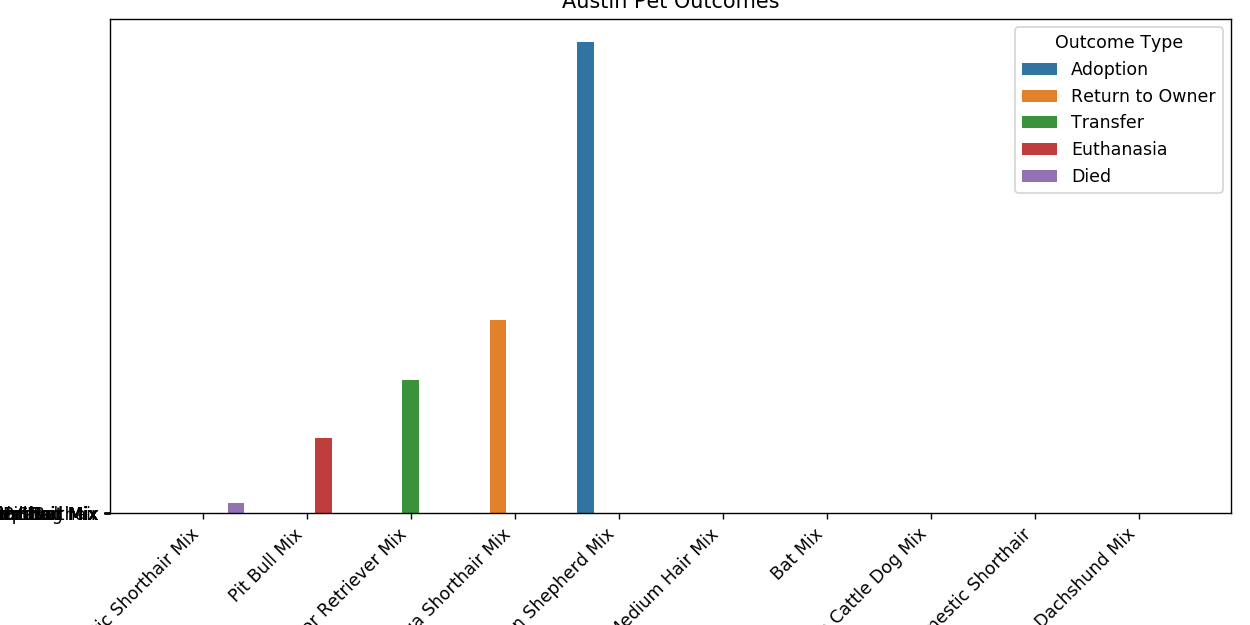

In [26]:
# Graph dog type vs count by Outcome Type
import seaborn as sns
plt.figure(figsize=(10,5))

chart = sns.barplot(ranked_breeds_graph['Breed'], ranked_breeds_graph['Animal Type'], hue=ranked_breeds_graph['Outcome Type'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=84)
plt.xticks(ha='right')
plt.tight_layout()
plt.show()

In [27]:
groupby_dog_outcome_db= austin_pet_df[["Animal Type", "Breed", "Outcome Subtype", "Outcome Type"]][austin_pet_df['Animal Type']=='Dog']
groupby_dog_db.head()

,Animal Type,Breed,Outcome Type,Color,Date
0,Dog,German Shepherd,Return to Owner,Black/Brown,09/12/2019
1,Dog,German Shepherd,Return to Owner,Black/Brown,09/12/2019
2,Dog,Cairn Terrier/Chihuahua Longhair,Adoption,Black/White,09/12/2019
4,Dog,Siberian Husky,Adoption,Gray/White,09/12/2019
5,Dog,St. Bernard Rough Coat,Return to Owner,Tan,09/12/2019


In [28]:
len(groupby_dog_db)

87675

In [29]:
len(groupby_dog_db.Breed.unique())

2417

In [30]:
bar_plot_db = pd.DataFrame(groupby_dog_db.Breed.value_counts()).reset_index()
bar_plot_db = bar_plot_db.rename(columns={
    'index':'breed',
    'Breed':'count'
})
bar_plot_db = bar_plot_db.loc[:9]
len(bar_plot_db)

10

In [31]:
bar_plot_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
breed    10 non-null object
count    10 non-null int64
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [32]:
bar_plot_db.breed

0       Domestic Shorthair Mix
1                 Pit Bull Mix
2       Labrador Retriever Mix
3      Chihuahua Shorthair Mix
4          German Shepherd Mix
5     Domestic Medium Hair Mix
6                      Bat Mix
7    Australian Cattle Dog Mix
8           Domestic Shorthair
9                Dachshund Mix
Name: breed, dtype: object

In [33]:
obj = []
for i in bar_plot_db.breed:
    obj.append(f'{i}')
    

In [34]:
obj

['Domestic Shorthair Mix',
 'Pit Bull Mix',
 'Labrador Retriever Mix',
 'Chihuahua Shorthair Mix',
 'German Shepherd Mix',
 'Domestic Medium Hair Mix',
 'Bat Mix',
 'Australian Cattle Dog Mix',
 'Domestic Shorthair',
 'Dachshund Mix']

In [35]:
objects = (bar_plot_db.breed)
y_pos = np.arange(len(obj))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, obj, align='center', alpha=0.5)
plt.xticks(y_pos, obj, rotation=45)
plt.ylabel('Usage')
plt.title('Austin Pet Outcomes')

plt.show()

In [36]:
df_test = (groupby_dog_db.groupby(['Breed','Outcome Type']).count()).reset_index()
df_test = df_test.rename(columns={
    'Animal Type': 'count'
})
df_test.head()

,Breed,Outcome Type,count,Color,Date
0,Abyssinian,Adoption,3,3,3
1,Abyssinian Mix,Adoption,3,3,3
2,Abyssinian Mix,Return to Owner,1,1,1
3,Affenpinscher Mix,Adoption,5,5,5
4,Affenpinscher Mix,Return to Owner,3,3,3


In [37]:
#Only Dogs
austin_pet_dog_df = austin_pet_df[austin_pet_df['Animal Type']=='Dog']
austin_pet_dog_df 

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Date
0,A765260,Zeus,09/12/2019 06:57:00 PM,09/12/2019 06:57:00 PM,05/16/2016,Return to Owner,NaN,Dog,Intact Male,3 years,German Shepherd,Black/Brown,09/12/2019
1,A765259,Oso,09/12/2019 06:56:00 PM,09/12/2019 06:56:00 PM,05/16/2016,Return to Owner,NaN,Dog,Intact Male,3 years,German Shepherd,Black/Brown,09/12/2019
2,A803895,NaN,09/12/2019 06:55:00 PM,09/12/2019 06:55:00 PM,09/08/2015,Adoption,NaN,Dog,Neutered Male,4 years,Cairn Terrier/Chihuahua Longhair,Black/White,09/12/2019
4,A803781,Sophia,09/12/2019 06:44:00 PM,09/12/2019 06:44:00 PM,09/06/2017,Adoption,NaN,Dog,Spayed Female,2 years,Siberian Husky,Gray/White,09/12/2019
5,A804232,Cookie,09/12/2019 06:41:00 PM,09/12/2019 06:41:00 PM,09/12/2017,Return to Owner,NaN,Dog,Intact Female,2 years,St. Bernard Rough Coat,Tan,09/12/2019
6,A804233,Firo,09/12/2019 06:41:00 PM,09/12/2019 06:41:00 PM,01/12/2019,Return to Owner,NaN,Dog,Intact Male,7 months,German Shepherd,Tan/Black,09/12/2019
7,A803129,Captain,09/12/2019 06:38:00 PM,09/12/2019 06:38:00 PM,08/27/2015,Adoption,NaN,Dog,Intact Female,4 years,German Shepherd,Black/Tricolor,09/12/2019
9,A803912,NaN,09/12/2019 06:23:00 PM,09/12/2019 06:23:00 PM,07/08/2019,Adoption,NaN,Dog,Spayed Female,2 months,Chihuahua Shorthair,Brown/Black,09/12/2019
10,A802746,Faith,09/12/2019 06:21:00 PM,09/12/2019 06:21:00 PM,06/30/2019,Adoption,NaN,Dog,Spayed Female,2 months,Beagle Mix,Tan/Black,09/12/2019
11,A803089,Beavis,09/12/2019 05:59:00 PM,09/12/2019 05:59:00 PM,08/27/2017,Adoption,NaN,Dog,Intact Female,2 years,German Shepherd,Tan/Black,09/12/2019
